# Cleaning Data for Analysis

## Data Types

There may be times we want to convert from one data type to another

**Categorical Data**

Columns that contain categorical data, such as Male / Female can be converting into 'category' dtype
* Can make the DataFrame smaller in memory
* Can make them be utilized by other Python libraries

In [1]:
import pandas as pd
df = pd.read_csv('https://assets.datacamp.com/production/repositories/666/datasets/b064fa9e0684a38ac15b0a19845367c29fde978d/tips.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


In [2]:
# Converting Data Types
df['smoker'] = df['smoker'].astype('bool')
df['sex'] = df['sex'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null bool
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: bool(1), category(1), float64(2), int64(1), object(2)
memory usage: 10.2+ KB


### Converting Data Types
* Numeric data loaded as a string, usually a sign of bad data that needs to be cleaned

In [3]:
# Converting total_bill into a numeric dtype
# errors='coerce' will set invalid values as NaN
df['total_bill'] = pd.to_numeric(df['total_bill'], errors='coerce')
df['tip'] = pd.to_numeric(df['tip'], errors='coerce')
df.dtypes

total_bill     float64
tip            float64
sex           category
smoker            bool
day             object
time            object
size             int64
dtype: object

## String Manipulation

* Much of data cleaning involves string manipulation
* Most of the world's data is unstructured text
* Python has many built-in and external libraries
* 're' library for regular expressions

### Regular Expression Match Example

***** - Matches it zero or more times

**{2}** - Matches exactly 2 values

**^** - Caret will tell the pattern to start the pattern match th a the beginning of value

**$** - Will tell the pattern to match at the end of the value

|Value      |Pattern Matched    |Regular Expression|
|-----------|-------------------|------------------|
|17         |12345678901        |\d*               |
|\$17       |\$12345678901      |\ $\d*            |
|\$17.00    |\$12345678901.24   |\ \$\d*\\.\d *    |
|\$17.89    |\$12345678901.24   |\ \$\d*\\.\d{2}   |
|\$17.895   |\$12345678901.999  |^\\$\d*\\.\d{2}\$ |

#### Using Regular Expressions

* Compile the pattern
* Use the compiled pattern to match values
* This lets use use the pattern over and over again
* Useful since we want to match values down a column of values

In [4]:
import re

# RegEx Pattern - Match a Phone Number in the format of xxx-xxx-xxxx
pattern = re.compile('\d{3}\-\d{3}\-\d{4}')

# See if the pattern matches
result = pattern.match('123-456-7890')
result2 = pattern.match('1123-456-7890')

print(f'{bool(result)}')
print(f'{bool(result2)}')

True
False


In [5]:
# Find the numeric values in a string
matches = re.findall('\d+', 'The Recipe calls for 10 apples and 3 bananas') 
print(matches)

['10', '3']


In [6]:
# Find the capital letter, followed by any number of alphanumeric characters, for the word
result = re.match(pattern='[A-Z]\w*', string='American Eagle 1977')
print(result.group())

American


## Using Functions to Clean Data

**Complex Cleaning**
* Cleaning step requires multiple steps
    * IE: Extract number from string
    * Perform transformation on extracted number
* Python Functions can be used

**Example 1**

In [7]:
def calculate_tip_percentage_of_total_bill(row):
    tip_amount = row['tip']
    total_bill = row['total_bill']
    tip_percentage_of_total_bill = (tip_amount / total_bill) * 100
    return tip_percentage_of_total_bill

In [8]:
# Note: By default .apply() will work column-wise as 'axis=0',
# 'axis=1' specifies running it row-wise
df['tip_percentage'] = df.apply(calculate_tip_percentage_of_total_bill,
                                             axis=1)
print(df.head())

   total_bill   tip     sex  smoker  day    time  size  tip_percentage
0       16.99  1.01  Female    True  Sun  Dinner     2        5.944673
1       10.34  1.66    Male    True  Sun  Dinner     3       16.054159
2       21.01  3.50    Male    True  Sun  Dinner     3       16.658734
3       23.68  3.31    Male    True  Sun  Dinner     2       13.978041
4       24.59  3.61  Female    True  Sun  Dinner     4       14.680765


**Example 2:** Update 'sex' column so that Female = 0, and Male = 1

In [9]:
def update_gender_column(gender):
    if gender == 'Female':
        return 0
    elif gender == 'Male':
        return 1
    else:
        return np.nan
    
df['gender_code'] = df['sex'].apply(update_gender_column)
print(df.head())

   total_bill   tip     sex  smoker  day    time  size  tip_percentage  \
0       16.99  1.01  Female    True  Sun  Dinner     2        5.944673   
1       10.34  1.66    Male    True  Sun  Dinner     3       16.054159   
2       21.01  3.50    Male    True  Sun  Dinner     3       16.658734   
3       23.68  3.31    Male    True  Sun  Dinner     2       13.978041   
4       24.59  3.61  Female    True  Sun  Dinner     4       14.680765   

  gender_code  
0           0  
1           1  
2           1  
3           1  
4           0  


## Duplicate and Missing Data

### Duplicates
* Can skew results
* We can drop duplicates using .drop_duplicates() method

**Drop Dpulicates**
```python
df = df.drop_duplicates()
```

### Missing Values

In [10]:
file = 'sample_data/titanic.csv'
df = pd.read_csv(file)
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
886,887,0,2,male,27.0,0,0,211536,13.00,NaN,S,"Montvila, Rev. Juozas"
887,888,1,1,female,19.0,0,0,112053,30.00,B42,S,"Graham, Miss. Margaret Edith"
888,889,0,3,female,NaN,1,2,W./C. 6607,23.45,NaN,S,"Johnston, Miss. Catherine Helen ""Carrie"""
889,890,1,1,male,26.0,0,0,111369,30.00,C148,C,"Behr, Mr. Karl Howell"
890,891,0,3,male,32.0,0,0,370376,7.75,NaN,Q,"Dooley, Mr. Patrick"


In [11]:
# Notice we have 891 entries, but many columns are missing entries. 
# For example, Age and Cabin are the 2 columnsw with the most missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Name           891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
df['Cabin'] = df['Cabin'].fillna('missing')
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
886,887,0,2,male,27.0,0,0,211536,13.00,missing,S,"Montvila, Rev. Juozas"
887,888,1,1,female,19.0,0,0,112053,30.00,B42,S,"Graham, Miss. Margaret Edith"
888,889,0,3,female,NaN,1,2,W./C. 6607,23.45,missing,S,"Johnston, Miss. Catherine Helen ""Carrie"""
889,890,1,1,male,26.0,0,0,111369,30.00,C148,C,"Behr, Mr. Karl Howell"
890,891,0,3,male,32.0,0,0,370376,7.75,missing,Q,"Dooley, Mr. Patrick"


#### Filling Missing Data
Since we have 714 / 891 entries in the 'Age' column, one way to deal with missing data is to find the mean value and use that where we have missing data. It might not be accurate, but certain calculations can not handle missing values.

In [13]:
import numpy as np
age_mean = np.mean(df['Age'])
age_mean

29.69911764705882

In [14]:
# Notice PassengerId 889 has their previously NaN value, updated to the Age's mean
df['Age'] = df['Age'].fillna(age_mean)
df.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name
886,887,0,2,male,27.000000,0,0,211536,13.00,missing,S,"Montvila, Rev. Juozas"
887,888,1,1,female,19.000000,0,0,112053,30.00,B42,S,"Graham, Miss. Margaret Edith"
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.45,missing,S,"Johnston, Miss. Catherine Helen ""Carrie"""
889,890,1,1,male,26.000000,0,0,111369,30.00,C148,C,"Behr, Mr. Karl Howell"
890,891,0,3,male,32.000000,0,0,370376,7.75,missing,Q,"Dooley, Mr. Patrick"


## Testing with Asserts
* Use Asserts to Programmatically vs visually checking
* If we drop or fill NaNs, we expect 0 missing values
* We can write an assert statement to verify this
* We can detect early warnings and errors
* This gives us confidence that our code is running correctly

### How Asserts work

In [15]:
# If true, nothing is returned
assert 1 == 1
# If false, returns an error
assert 1 == 2

AssertionError: 

In [16]:
# Note: Need to chain two .all(), 
# 1st .all() to return True or False for each column
# 2nd .alll() to return a single True or False
assert df.notnull().all().all()

AssertionError: 

In [17]:
assert (df['Age'] >=0).all().all()

## Case Study- Putting it all together

* Using all techniques previously discussed to work on the Gapminder Foundation dataset.
* Clean and tidy data saved to a file
    * Ready to be loaded for analysis!
* Dataset consists of life expectancy by country and year
* Data will come in multiple parts
    * Load
    * Preliminary quality diagnosis
    * Combine into single dataset

### Useful methods
* df = pd.read_csv('file_name.csv')
* df.head()
* df.info()
* df.columns
* df.describe()
* df.column.value_counts()
* df.column.plot('hist')

### Data Quality
```python
def cleaning_function(row_data):
    # data cleaning logic
    return ...
# Default: Axis = 0 will apply the function column-wise
#          Axis = 1 will apply the function row-wise
df.apply(cleaning_function, axis=1)
assert(df.column_data > 0).all()
```

### Combining Data
* pd.merge(df1, df2, ...)
* pd.concat([df1, df2, ...])

In [18]:
file ='https://assets.datacamp.com/production/repositories/666/datasets/8e869c545c913547d94b61534b2f8d336a2c8c87/gapminder.csv'
df = pd.read_csv(file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Columns: 219 entries, Unnamed: 0 to Life expectancy
dtypes: float64(217), int64(1), object(1)
memory usage: 1.3+ MB


(20, 55)

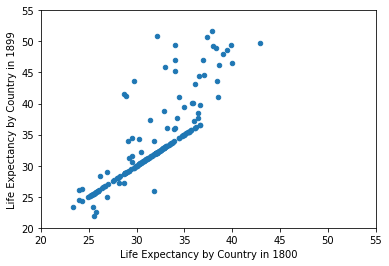

In [20]:
import matplotlib.pyplot as plt

# Create the scatter plot
df.plot(kind='scatter', x='1800', y='1899')

# Specify axis limitsfy axis labels
plt.xlabel('Life Expectancy by Country in 1800')
plt.ylabel('Life Expectancy by Country in 1899')

# Specify axis limits
plt.xlim(20, 55)
plt.ylim(20, 55)

* Looking at the graph, we can see whether the scatter plot takes the form a diagonal line, and which points fall below or above the diagonal line.
* Points that fall above or below the diagonal line inform us how life expectancy in 1899 changed (or did not change) when compared to 1800 for different countries.
* Note: When the points fall on the diagonal line, it means that life expectancy remained the same

In [21]:
def check_null_or_valid(row):
    """Function that takes a row of data, drops all missing values, and checks if all remaining values are >= 0"""
    no_na = row.dropna()
    numeric_type = pd.to_numeric(no_na)
    return numeric_type >= 0

# Check whether the last column is 'Life expectancy'
assert df.columns[-1] == 'Life expectancy'

# Check whether the values in the row are valid
# Note: loc gets rows (or columns) with particular 'labels'
#      iloc gets row (or columns) at a particular 'index position'
assert df.iloc[: , :-1].apply(check_null_or_valid, axis=1).all().all()

# Check that there is only one instance of each country
assert df['Life expectancy'].value_counts().all() == 1

### Initial impressions of the data

**Principles of Tidy Data*
* Rows form observations
* Columns form variables
* Tidying data will make data cleaning easier
* Melting turns columns into rows
* Pivot will take unique values from a column and create new columns

#### Checking Data Types
```python
df.dtypes

# To change column type
df['column name'] = pd.to_numeric(df['column name'])
df['column name'] = df['column name'].astype(str)

# Additional calculations and saving your data
df['new column'] = df['column1'] + df['column2']
df['new column'] = df.apply(my_function, axis=1) #Note: Axis=0 => Column-wise, Axis=1 => Row-wise

# Save dataframe to csv
df.to_csv['my_data.csv']
```

### Reshaping your data
Reshape data into a *tidy* data format.

In [22]:
gapminder_melt = pd.melt(frame=df, id_vars='Life expectancy')

In [23]:
gapminder_melt.columns = ['country', 'year', 'life_expectancy']

In [24]:
gapminder_melt.tail()

,country,year,life_expectancy
170035,Yugoslavia,2016,NaN
170036,Zambia,2016,57.10
170037,Zimbabwe,2016,61.69
170038,Åland,2016,NaN
170039,South Sudan,2016,56.10


### Looking at country spellings
Check that countries contain a set of upper case followed by a set of lower case letters. There should be whitespace between words and a period for any abbreviation.

In [25]:
# Create the series of countries
countries = gapminder_melt['country']

# Drop all the duplicates from the countries
countries = countries.drop_duplicates()

# Regular Expression Pattern
# ^ - Start matching from beginning
# $ - Match until the end
# A-Za-z - Match upper and lower case letters
# \. - Match Periods
# \s - Match whitespaces
# *  - Match pattern 0 or more times
pattern = '^[A-Za-z\.\s]*$'

# Finding values that do not match. This is done with the '~' operator
mask_inverse = ~countries.str.contains(pattern)

# Subset countries with invalid countries
invalid_countries = countries.loc[mask_inverse]

invalid_countries

49            Congo, Dem. Rep.
50                 Congo, Rep.
53               Cote d'Ivoire
73      Falkland Is (Malvinas)
93               Guinea-Bissau
98            Hong Kong, China
118    United Korea (former)\n
131               Macao, China
132             Macedonia, FYR
145      Micronesia, Fed. Sts.
161            Ngorno-Karabakh
187             St. Barthélemy
193     St.-Pierre-et-Miquelon
225                Timor-Leste
251      Virgin Islands (U.S.)
252       North Yemen (former)
253       South Yemen (former)
258                      Åland
Name: country, dtype: object

### More data cleaning and processing

In [26]:
# Assert that country does not contain any missing values
assert pd.notnull(gapminder_melt['country']).all()

# Assert that country does not contain any missing valuesrt that year does not contain any missing values
assert pd.notnull(gapminder_melt['year']).all()

In [27]:
gapminder_melt.shape

(170040, 3)

In [28]:
# Drop the missing values
gapminder_melt = gapminder_melt.dropna()
gapminder_melt.shape

(44637, 3)

### Plotting

year
2013           71.916106
2014           72.088125
2015           72.321010
2016           72.556635
Unnamed: 0    129.500000
Name: life_expectancy, dtype: float64

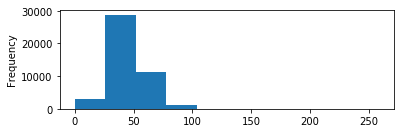

In [29]:
# Add first subplot
plt.subplot(2, 1, 1) 

# Create a histogram of life_expectancy
gapminder_melt.life_expectancy.plot(kind='hist')

# Group gapminder: gapminder_agg
gapminder_agg = gapminder_melt.groupby('year')['life_expectancy'].mean()

# Print the tail of gapminder_agg
gapminder_agg.tail()

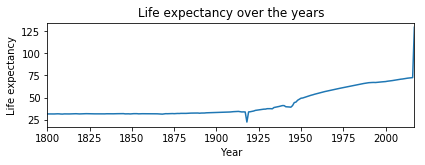

C:\Users\cgrindean\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.


In [30]:
# Add second subplot
plt.subplot(2, 1, 2)

# Create a line plot of life expectancy per year
gapminder_agg.plot()

# Add title and specify axis labels
plt.title('Life expectancy over the years')
plt.ylabel('Life expectancy')
plt.xlabel('Year')

# Display the plots
plt.tight_layout()
plt.show()

# Save both DataFrames to csv files
gapminder_melt.to_csv('sample_data/gapminder.csv')
gapminder_agg.to_csv('sample_data/gapminder_agg.csv')